In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from pyts.decomposition import SingularSpectrumAnalysis
import warnings
import itertools
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import periodogram, find_peaks
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox, normaltest
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import pywt
from sklearn.decomposition import PCA
from numpy.lib.stride_tricks import sliding_window_view
from sklearn.utils.extmath import randomized_svd
from PyEMD import EMD
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from pykalman import KalmanFilter
import torch
import torch.nn as nn
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from astropy.timeseries import LombScargle
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from scipy.stats import ttest_ind
import datetime
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import correlate
from scipy.fft import fft, fftfreq
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from collections import Counter
from sklearn.cluster import DBSCAN
import requests
from io import StringIO
from scipy.stats import spearmanr
from sklearn.metrics import mutual_info_score
from statsmodels.tsa.stattools import grangercausalitytests
from pyinform.transferentropy import transfer_entropy
from tigramite.data_processing import DataFrame as TDF
from tigramite.pcmci import PCMCI
import pyinform
from sklearn.ensemble import IsolationForest
import yfinance as yf
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.nn as nn
from pytrends.request import TrendReq
from fredapi import Fred
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import torch.optim as optim
from sklearn.utils import resample
from scipy.signal import hilbert
from dtaidistance import dtw
from scipy.signal import coherence, csd
from pycoingecko import CoinGeckoAPI
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy.stats import pearsonr
import joblib
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pytz
from tqdm import tqdm
from scipy.stats import zscore
from scipy.ndimage import median_filter
from sklearn.metrics import precision_score, recall_score, f1_score
import ta
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import VotingClassifier
from collections import defaultdict
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting  # Нужно для активации
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import nltk
import spacy
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, auc
import rbo
import string
from gensim.models import Word2Vec
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from scipy import sparse
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import TruncatedSVD
import ast
from itertools import combinations
import matplotlib.pyplot as plt
from math import pi

# Подавляем только FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('Reddit_Data.csv')

In [4]:
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


# Проверим и подготовим текст

In [6]:
texts = df['clean_comment'].tolist()  # список текстов

In [7]:
print(f"Всего текстов: {len(texts)}")
print(f"Количество пустых или NaN: {(np.array(texts) == '').sum()}")
non_strs = [type(t) for t in texts if not isinstance(t, str)]
print(f"Типы нестроковых элементов: {set(non_strs)}")
print(f"Количество нестроковых элементов: {len(non_strs)}")


Всего текстов: 37249
Количество пустых или NaN: 0
Типы нестроковых элементов: {<class 'float'>}
Количество нестроковых элементов: 100


In [8]:
texts = [t if isinstance(t, str) else '' for t in texts]

In [9]:
print(f"Всего текстов: {len(texts)}")
print(f"Количество пустых или NaN: {(np.array(texts) == '').sum()}")
non_strs = [type(t) for t in texts if not isinstance(t, str)]
print(f"Типы нестроковых элементов: {set(non_strs)}")
print(f"Количество нестроковых элементов: {len(non_strs)}")

Всего текстов: 37249
Количество пустых или NaN: 100
Типы нестроковых элементов: set()
Количество нестроковых элементов: 0


In [10]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def preprocess_spacy_pipe(texts):
    lemmatized_texts = []
    tokens_list = []
    for doc in nlp.pipe(texts, batch_size=1000):
        tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
        lemmatized_texts.append(" ".join(tokens))
        tokens_list.append(tokens)
    return lemmatized_texts, tokens_list

In [11]:
lemmatized_texts, tokens = preprocess_spacy_pipe(texts)

In [15]:
# Сохранение
df_preprocess = pd.DataFrame({
    "lemmatized_text": lemmatized_texts,
    "tokens": tokens  # сохраняем как список
})
df_preprocess.to_csv("preprocessed_texts.csv", index=False)

In [18]:
df_preprocess = pd.read_csv("preprocessed_texts.csv", converters={"tokens": ast.literal_eval})

# Векторизаторы

## 1. Классические вектора — CountVectorizer и TfidfVectorizer

In [11]:
# CountVectorizer (мешок слов)
count_vec = CountVectorizer(max_features=10000) 
X_count = count_vec.fit_transform(lemmatized_texts)

# TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vec.fit_transform(lemmatized_texts)

print(X_count.shape, X_tfidf.shape)  # (кол-во текстов, размер словаря)

(37249, 10000) (37249, 10000)


## 2. Word2Vec / GloVe (без предобученной модели)

In [17]:
def get_avg_w2v(tokens, model, dim=300):
    valid_words = [w for w in tokens if w in model.wv]
    if not valid_words:
        return np.zeros(dim)
    vectors = np.array([model.wv[w] for w in valid_words])
    return vectors.mean(axis=0)

In [18]:
w2v_model_manual = Word2Vec(
    sentences=tokens,       # список списков токенов
    vector_size=300,        # размер эмбеддинга
    window=5,               # окно контекста
    min_count=5,            # минимальная частота слова
    workers=4,              # число потоков
    sg=1                    # optional: 1=SkipGram, 0=CBOW (по умолчанию CBOW)
)
X_w2v_manual = np.array([
    get_avg_w2v(toks, w2v_model_manual) 
    for toks in tqdm(tokens, desc="Векторизация (Word2Vec manual)")
])
print(X_w2v_manual.shape) 

Векторизация (Word2Vec manual): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37249/37249 [00:01<00:00, 21845.45it/s]


(37249, 300)


## 3. Word2Vec + Tfidf

In [19]:
# ФУнкция сборки в общий  вектор с учетом весов Tfidf
def get_tfidf_w2v(tokens, model, idf_dict, dim=300):
    vectors = []
    weights = []
    for token in tokens:
        if token in model.wv and token in idf_dict:
            vectors.append(model.wv[token] * idf_dict[token])
            weights.append(idf_dict[token])
    if not vectors:
        return np.zeros(dim)
    return np.sum(vectors, axis=0) / np.sum(weights)

In [21]:
tfidf_vocab = tfidf_vec.vocabulary_
idf_scores = tfidf_vec.idf_
idf_dict = dict(zip(tfidf_vec.get_feature_names_out(), idf_scores))

In [23]:
X_tfidf_w2v_manual = np.array([get_tfidf_w2v(toks, w2v_model_manual, idf_dict) for toks in tqdm(tokens, desc="Векторизация (Word2Vec manual)")])
print(X_tfidf_w2v_manual.shape) 

Векторизация (Word2Vec manual): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37249/37249 [00:03<00:00, 11460.16it/s]

(37249, 300)


## 4. Word2Vec / GloVe — усреднённые эмбеддинги (на предобученной модели)

In [26]:
def get_avg_w2v_pred(tokens, model, dim=300):
    valid_words = [w for w in tokens if w in model]
    if not valid_words:
        return np.zeros(dim)
    vectors = np.array([model[w] for w in valid_words])
    return vectors.mean(axis=0)


In [24]:
# Загружаем предобученный Word2Vec (Google News 300d)
w2v_model = api.load('word2vec-google-news-300')

In [27]:
X_w2v = np.array([
    get_avg_w2v_pred(toks, w2v_model) 
    for toks in tqdm(tokens, desc="Word2Vec Google News")
])
print(X_w2v.shape)  # (кол-во текстов, 300)

Word2Vec Google News: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37249/37249 [00:01<00:00, 20538.41it/s]


(37249, 300)


## 5. FastText

In [32]:
ft_model = api.load('fasttext-wiki-news-subwords-300')

def get_avg_fasttext(text, model, dim=300):
    valid_words = [w for w in tokens if w in model]
    if not valid_words:
        return np.zeros(dim)
    vectors = np.array([model[w] for w in valid_words])
    return vectors.mean(axis=0)

X_fasttext = np.array([
    get_avg_w2v_pred(toks, w2v_model) 
    for toks in tqdm(tokens, desc="fasttext-wiki-news-subwords")
])
print(X_fasttext.shape)

fasttext-wiki-news-subwords: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37249/37249 [00:01<00:00, 21237.31it/s]


(37249, 300)


## 6. Transformer-based модели (BERT, RoBERTa, DistilBERT) через HuggingFace

In [35]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_name = 'distilbert-base-uncased'  # можно сменить на bert-base-uncased, roberta-base и др.
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()

def get_bert_embeddings(texts, tokenizer, model, device, batch_size=32):
    embeddings = []
    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size),desc="DistilBERT"):
            batch = texts[i:i+batch_size]
            encoded = tokenizer(batch, padding=True, truncation=True, return_tensors='pt')
            input_ids = encoded['input_ids'].to(device)
            attention_mask = encoded['attention_mask'].to(device)
            output = model(input_ids, attention_mask=attention_mask)
            # CLS token embedding
            batch_embeddings = output.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

X_bert = get_bert_embeddings(lemmatized_texts, tokenizer, model, device)
print(X_bert.shape)  # (кол-во текстов, размер эмбеддинга, обычно 768)

DistilBERT: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1165/1165 [03:09<00:00,  6.15it/s]

(37249, 768)


## 7. Transformer-based модели Sentence-BERT (SBERT)

In [36]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

X_sbert = sbert_model.encode(lemmatized_texts, batch_size=32, show_progress_bar=True)
print(X_sbert.shape)  # (кол-во текстов, 384 обычно)


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1165/1165 [00:17<00:00, 65.21it/s]


(37249, 384)


| Характеристика               | Word2Vec                                          | FastText                                                         |
| ---------------------------- | ------------------------------------------------- | ---------------------------------------------------------------- |
| **Обучение**                 | Каждое слово целиком                              | Каждое слово разбивается на n-граммы (части слова)               |
| **Обработка OOV слов**       | Не умеет (если слова нет в словаре — нет вектора) | Может генерировать вектор для неизвестных слов на основе подслов |
| **Учет морфологии**          | Нет                                               | Да (через n-граммы)                                              |
| **Качество для редких слов** | Плохое                                            | Лучше, так как учитывает составные части                         |
| **Применение**               | Стандартные эмбеддинги слов                       | Более устойчив к ошибкам, новым словам и морфологии              |


| Модель                    | Описание                                                                              | Цель/Применение                                                                                                            |
| ------------------------- | ------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- |
| **DistilBERT**            | Уменьшенная, ускоренная версия BERT (обрезанная, сжата)                               | Быстрее и легче, но выдает эмбеддинги для отдельных токенов/предложений как у BERT                                         |
| **Sentence-BERT (SBERT)** | Специально дообученная модель на задачи семантического поиска и сравнения предложений | Выдает **качественные эмбеддинги для всего предложения/текста**, удобна для сравнения текстов (косинусное сходство и т.п.) |


In [38]:
# sparse.save_npz("X_tfidf.npz", X_tfidf)
# sparse.save_npz("X_count.npz", X_count)

In [19]:
X_tfidf = sparse.load_npz("X_tfidf.npz")
X_count = sparse.load_npz("X_count.npz")

In [40]:
# np.savez_compressed("vectors.npz", X_w2v_manual=X_w2v_manual, X_tfidf_w2v_manual=X_tfidf_w2v_manual, X_w2v = X_w2v,  X_fasttext = X_fasttext, X_bert=X_bert, X_sbert = X_sbert)

In [20]:
data = np.load("vectors.npz")
X_w2v_manual = data['X_w2v_manual']
X_tfidf_w2v_manual = data['X_tfidf_w2v_manual']
X_w2v = data['X_w2v']
X_fasttext = data['X_fasttext']
X_bert = data['X_bert']
X_sbert = data['X_sbert']

# Сравнение векторизаторов

## 1. Классификация

In [32]:
y = df['category']

In [56]:
def evaluate_classifier(X, y, model=None, name="Model"):
    if model is None:
        model = LogisticRegression(max_iter=1000)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    acc_scores = []
    f1_scores = []
    prec_scores = []
    recall_scores = []

    for train_idx, test_idx in tqdm(cv.split(X, y), desc ="Классификация"):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        prec_scores.append(precision_score(y_test, y_pred, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred, average='macro'))

    print(f"{name} — Accuracy: {np.mean(acc_scores):.4f}, F1: {np.mean(f1_scores):.4f}, Precision: {np.mean(prec_scores):.4f}, Recall: {np.mean(recall_scores):.4f}")


In [57]:
evaluate_classifier(X_tfidf, y, name="TF-IDF")
evaluate_classifier(X_count, y, name="X_count")
evaluate_classifier(X_w2v_manual, y, name="X_w2v_manual")
evaluate_classifier(X_tfidf_w2v_manual, y, name="X_tfidf_w2v_manual")
evaluate_classifier(X_w2v, y, name="Word2Vec")
evaluate_classifier(X_fasttext, y, name="FastText")
evaluate_classifier(X_bert, y, name="BERT")
evaluate_classifier(X_sbert, y, name="SBERT")


Классификация: 5it [00:55, 11.06s/it]


TF-IDF — Accuracy: 0.7941, F1: 0.7746, Precision: 0.7985, Recall: 0.7674


Классификация: 5it [01:03, 12.74s/it]


X_count — Accuracy: 0.8071, F1: 0.7924, Precision: 0.7990, Recall: 0.7905


Классификация: 5it [00:30,  6.17s/it]


X_w2v_manual — Accuracy: 0.6224, F1: 0.5742, Precision: 0.6155, Recall: 0.5712


Классификация: 5it [00:30,  6.13s/it]


X_tfidf_w2v_manual — Accuracy: 0.6149, F1: 0.5639, Precision: 0.6077, Recall: 0.5618


Классификация: 5it [00:10,  2.10s/it]


Word2Vec — Accuracy: 0.6528, F1: 0.6147, Precision: 0.6432, Recall: 0.6089


Классификация: 5it [00:10,  2.07s/it]


FastText — Accuracy: 0.6528, F1: 0.6147, Precision: 0.6432, Recall: 0.6089


Классификация: 5it [06:09, 73.86s/it]


BERT — Accuracy: 0.6963, F1: 0.6636, Precision: 0.6755, Recall: 0.6609


Классификация: 5it [00:19,  3.92s/it]

SBERT — Accuracy: 0.6941, F1: 0.6625, Precision: 0.6770, Recall: 0.6581


| Представление         | Accuracy | F1     | Время      |
| --------------------- | -------- | ------ | ---------- |
| **TF-IDF**            | 0.7941   | 0.7746 | \~55 c     |
| **CountVectorizer**   | 0.8071   | 0.7924 | \~63 c     |
| Word2Vec (manual)     | 0.6224   | 0.5742 | \~30 c     |
| TFIDF + Word2Vec      | 0.6149   | 0.5639 | \~30 c     |
| Word2Vec (pretrained) | 0.6528   | 0.6147 | \~10 c     |
| **FastText**          | 0.6528   | 0.6147 | \~10 c     |
| **BERT**              | 0.6963   | 0.6636 | ⏱️ \~6 мин |
| SBERT                 | 0.6941   | 0.6625 | \~19 c     |



✅ Победители:
- CountVectorizer показывает наилучший результат классификации.
- TF-IDF почти не уступает.
- BERT/SBERT — чуть хуже по метрикам,.



## 2. Кластеризация

In [21]:
def evaluate_clustering(X, name="Model", k=3):

    if sparse.issparse(X):
        svd = TruncatedSVD(n_components=100, random_state=42)
        X_dense = svd.fit_transform(X)
    else:
        X_dense = X

    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_dense)

    sil = silhouette_score(X_dense, labels)
    dbi = davies_bouldin_score(X_dense, labels)

    print(f"{name} — Silhouette: {sil:.4f}, DB Index: {dbi:.4f}")

In [22]:
evaluate_clustering(X_tfidf,name="TF-IDF")
evaluate_clustering(X_count, name="X_count")
evaluate_clustering(X_w2v_manual, name="Word2Vec manual")
evaluate_clustering(X_tfidf_w2v_manual,name="tfidf with Word2Vec")
evaluate_clustering(X_w2v, name="Word2Vec_pre")
evaluate_clustering(X_fasttext, name="FastText")
evaluate_clustering(X_bert, name="BERT")
evaluate_clustering(X_sbert,name="SBERT")

TF-IDF — Silhouette: 0.0696, DB Index: 2.6855
X_count — Silhouette: 0.7588, DB Index: 1.7680
Word2Vec manual — Silhouette: 0.0720, DB Index: 3.0695
tfidf with Word2Vec — Silhouette: 0.0881, DB Index: 2.8387
Word2Vec_pre — Silhouette: 0.0991, DB Index: 3.4459
FastText — Silhouette: 0.0991, DB Index: 3.4459
BERT — Silhouette: 0.1499, DB Index: 2.1772
SBERT — Silhouette: 0.0305, DB Index: 5.4411


| Представление         | Silhouette | DB Index   |
| --------------------- | ---------- | ---------- |
| TF-IDF                | **0.0696** | 2.6855     |
| **CountVectorizer**   | **0.7588** | 1.7680   ✅ |
| Word2Vec (manual)     | 0.0720     | 3.0695     |
| TFIDF + Word2Vec      | 0.0881     | 2.8387     |
| Word2Vec (pretrained) | 0.0991     | 3.4459     |
| FastText              | 0.0991     | 3.4459     |
| **BERT**              | 0.1499     | **2.1772** |
| SBERT                 | 0.0305     | 5.4411   ⛔ |


✅ Победители:
- CountVectorizer — лучший по кластеризации.
- BERT тоже хорош (низкий DB Index).
- SBERT неожиданно хуже всех — сильная переобобщённость и смешение классов.



## 3. Косинусное сравнение между векторами

In [37]:
def compare_all_representations(representations: dict, sample_size=1000, target_dim=None):
    reduced_reps = {}
    names = list(representations.keys())
    n = len(names)
    similarity_matrix = np.zeros((n, n))

    # Определяем минимальное число признаков среди всех представлений
    if target_dim is None:
        min_dim = min(X.shape[1] for X in representations.values())
        target_dim = min_dim
        print(f"Auto-setting target_dim to minimal dimension: {target_dim}")

    # Преобразование представлений
    for name, X in representations.items():
        if sparse.issparse(X):
            X_sample = X[:sample_size]
        else:
            X_sample = X[:sample_size]

        if X_sample.shape[1] > target_dim:
            print(f"Reducing {name} from {X_sample.shape[1]} to {target_dim} using SVD")
            svd = TruncatedSVD(n_components=target_dim, random_state=42)
            X_sample = svd.fit_transform(X_sample)
        elif X_sample.shape[1] < target_dim:
            print(f"Warning: {name} has smaller dimension {X_sample.shape[1]} than target_dim {target_dim}. No padding done.")

        reduced_reps[name] = X_sample

    # Подсчёт косинусной близости между всеми парами
    results = []
    for i, name1 in enumerate(names):
        X1 = reduced_reps[name1]
        for j, name2 in enumerate(names):
            X2 = reduced_reps[name2]
            sims = [cosine_similarity(X1[k:k+1], X2[k:k+1])[0, 0] for k in range(sample_size)]
            avg_sim = np.mean(sims)
            similarity_matrix[i, j] = avg_sim
            if i < j:
                results.append({
                    "Model 1": name1,
                    "Model 2": name2,
                    "Cosine Similarity": round(avg_sim, 4)
                })

    df_results = pd.DataFrame(results)
    print(df_results)

    return df_results, similarity_matrix, names

In [38]:
representations = {
    "TF-IDF": X_tfidf,
    "CountVectorizer": X_count,
    "BERT": X_bert,
    "SBERT": X_sbert,
    "Word2Vec_pre": X_w2v,
    "Word2Vec manual": X_w2v_manual,
    "tfidf with Word2Vec": X_tfidf_w2v_manual,
    "FastText": X_fasttext
}

df_results, sim_matrix, names = compare_all_representations(representations, sample_size=1000)

Auto-setting target_dim to minimal dimension: 300
Reducing TF-IDF from 10000 to 300 using SVD
Reducing CountVectorizer from 10000 to 300 using SVD
Reducing BERT from 768 to 300 using SVD
Reducing SBERT from 384 to 300 using SVD
                Model 1              Model 2  Cosine Similarity
0                TF-IDF      CountVectorizer               0.03
1                TF-IDF                 BERT              -0.10
2                TF-IDF                SBERT               0.07
3                TF-IDF         Word2Vec_pre              -0.00
4                TF-IDF      Word2Vec manual               0.01
5                TF-IDF  tfidf with Word2Vec               0.01
6                TF-IDF             FastText              -0.00
7       CountVectorizer                 BERT              -0.13
8       CountVectorizer                SBERT               0.08
9       CountVectorizer         Word2Vec_pre              -0.00
10      CountVectorizer      Word2Vec manual               0.01
11  

In [45]:
def visualize_similarity(names, similarity_matrix):
    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=names, yticklabels=names,
                cmap="viridis", annot=True, fmt=".2f")
    plt.title("Cosine Similarity Between Representations")
    plt.show()

    # Markdown таблица
    df_sim = pd.DataFrame(similarity_matrix, index=names, columns=names)
    print("\n### Markdown-таблица косинусной схожести:")
    print(df_sim.round(4).to_markdown())

    df_radar = df_sim.copy()
    categories = list(df_radar.columns)
    N = len(categories)

    plt.figure(figsize=(8, 8))
    for i, row in df_radar.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]  # замкнуть круг
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        plt.polar(angles, values, label=i, linewidth=1.5)

    plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories, rotation=90)
    plt.title("Radar Chart of Average Cosine Similarities", size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

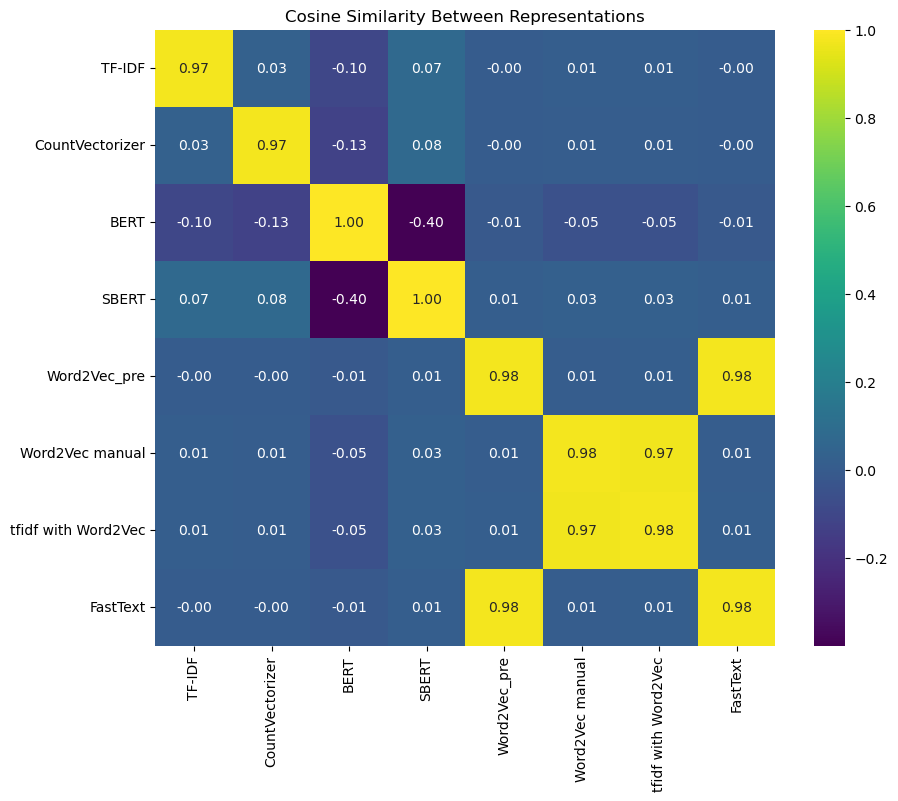


### Markdown-таблица косинусной схожести:
|                     |   TF-IDF |   CountVectorizer |    BERT |   SBERT |   Word2Vec_pre |   Word2Vec manual |   tfidf with Word2Vec |   FastText |
|:--------------------|---------:|------------------:|--------:|--------:|---------------:|------------------:|----------------------:|-----------:|
| TF-IDF              |   0.975  |            0.0286 | -0.1022 |  0.0706 |        -0.0004 |            0.0143 |                0.0144 |    -0.0004 |
| CountVectorizer     |   0.0286 |            0.975  | -0.1252 |  0.0757 |        -0.0003 |            0.0058 |                0.0059 |    -0.0003 |
| BERT                |  -0.1022 |           -0.1252 |  1      | -0.4    |        -0.0142 |           -0.0537 |               -0.0533 |    -0.0142 |
| SBERT               |   0.0706 |            0.0757 | -0.4    |  1      |         0.0104 |            0.025  |                0.0255 |     0.0104 |
| Word2Vec_pre        |  -0.0004 |           -0.0003 | -0.0142 

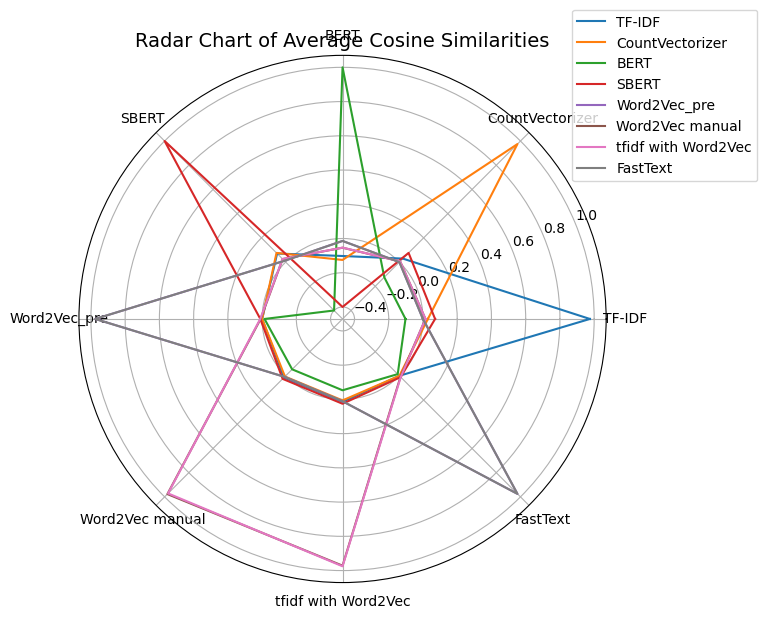

In [46]:
visualize_similarity(names, sim_matrix)

🧭 3. Косинусная близость между представлениями
Взаимная близость по структуре векторов:
- Word2Vec и FastText — почти идентичны: 0.97
- Word2Vec manual ≈ TFIDF + Word2Vec: 0.97
- BERT vs SBERT: –0.40 (!!) — они дают принципиально разные пространственные представления.
- TF-IDF vs BERT: –0.10 (далеки)

## 4. Визуальное сравнение

In [30]:
def visualize_embeddings(X, y, method='pca', title="", sample_size=3000, target_dim=50):
    # Сэмплирование
    if sample_size < len(y):
        indices = np.random.RandomState(seed=42).choice(len(y), size=sample_size, replace=False)
    else:
        indices = np.arange(len(y))
    
    X_sample = X[indices]
    y_sample = np.array(y)[indices]

    # Приведение к плотному виду, если разреженная матрица
    if sparse.issparse(X_sample):
        print(f"{title}: sparse -> SVD to {target_dim}")
        svd = TruncatedSVD(n_components=target_dim, random_state=42)
        X_sample = svd.fit_transform(X_sample)
    elif X_sample.shape[1] > target_dim:  # слишком большая плотная матрица
        print(f"{title}: dense -> PCA to {target_dim}")
        pca = PCA(n_components=target_dim, random_state=42)
        X_sample = pca.fit_transform(X_sample)

    # Уменьшение до 2D
    if method == 'pca':
        reducer = PCA(n_components=2, random_state=42)
    else:
        reducer = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=500)

    X_reduced = reducer.fit_transform(X_sample)

    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, cmap='coolwarm', alpha=0.5, s=10)
    plt.title(f"{title} ({method.upper()})")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

=== TF-IDF ===
TF-IDF: sparse -> SVD to 50


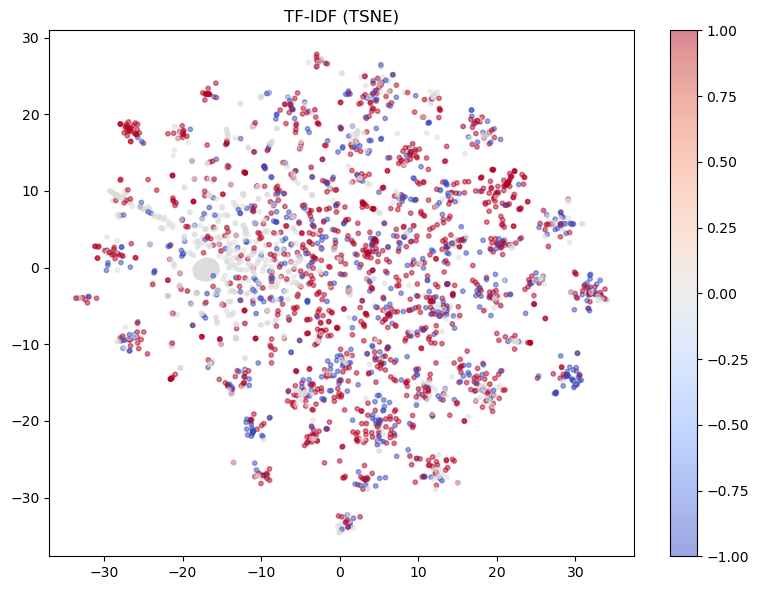

=== CountVectorizer ===
CountVectorizer: sparse -> SVD to 50


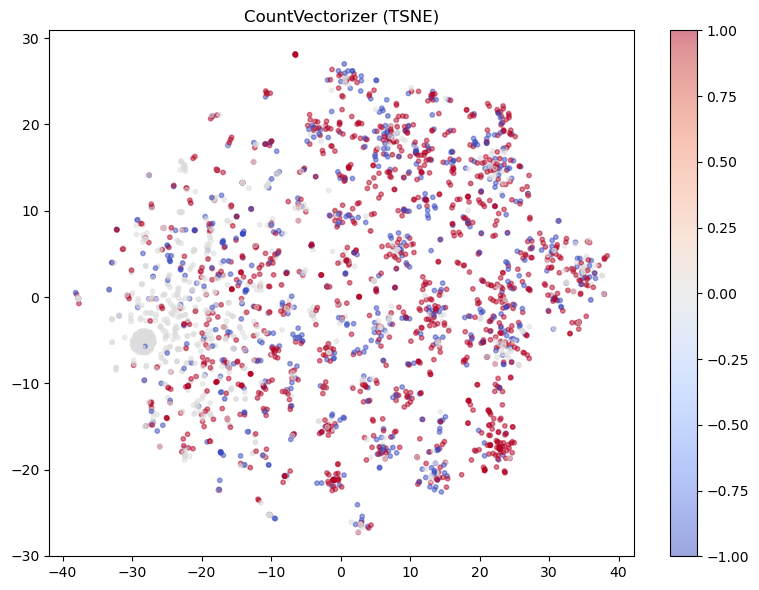

=== W2V Avg Manual ===
W2V Avg Manual: dense -> PCA to 50


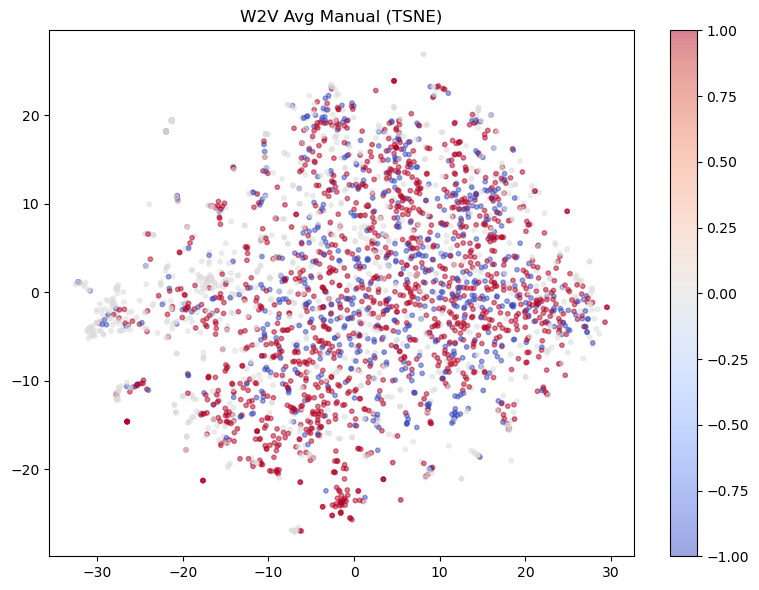

=== TFIDF + W2V ===
TFIDF + W2V: dense -> PCA to 50


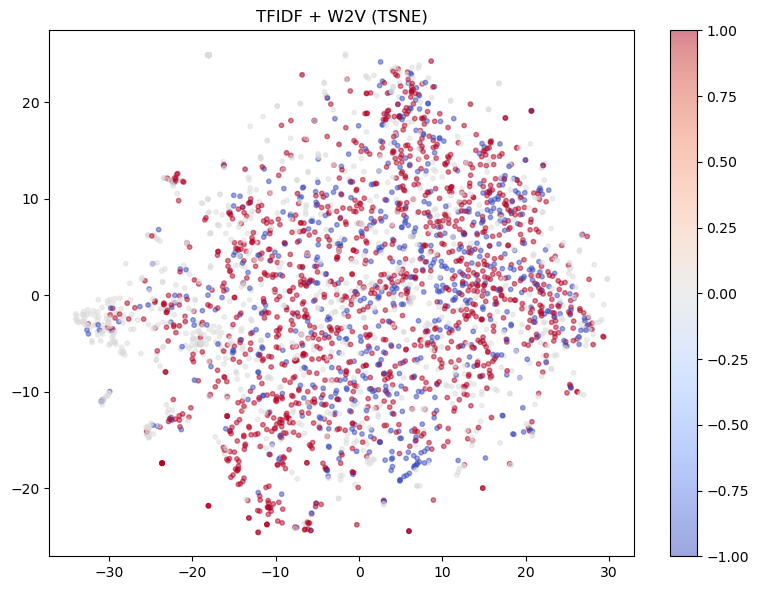

=== Word2Vec ===
Word2Vec: dense -> PCA to 50


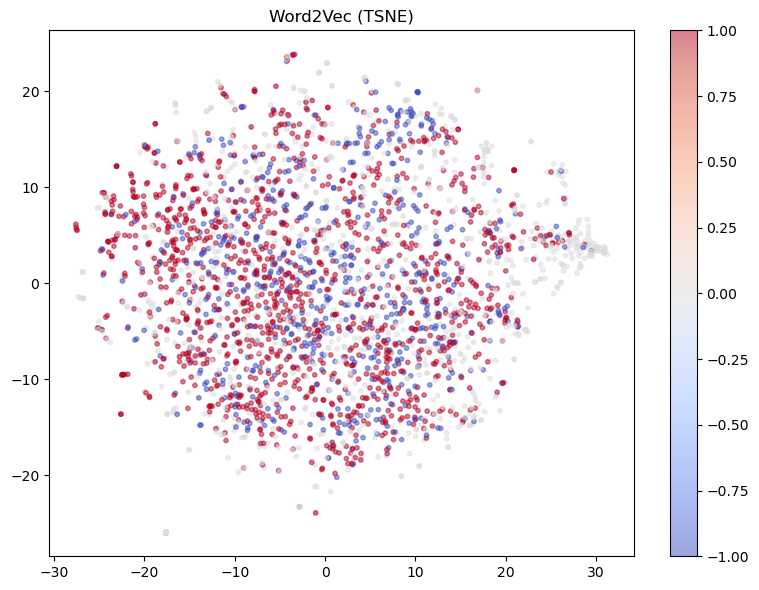

=== FastText ===
FastText: dense -> PCA to 50


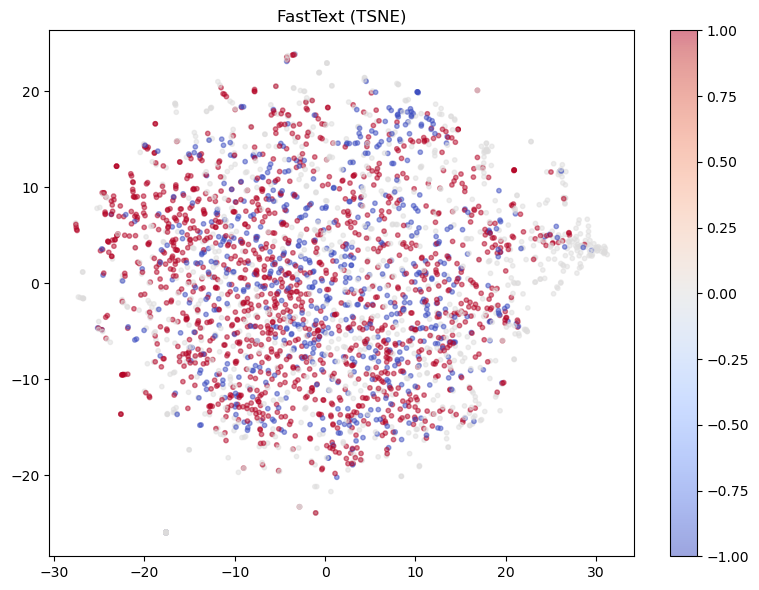

=== BERT ===
BERT: dense -> PCA to 50


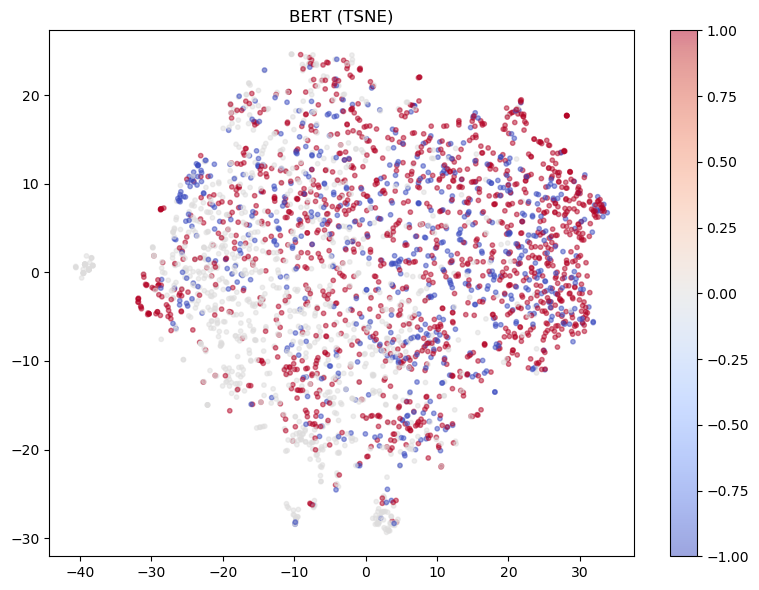

=== SBERT ===
SBERT: dense -> PCA to 50


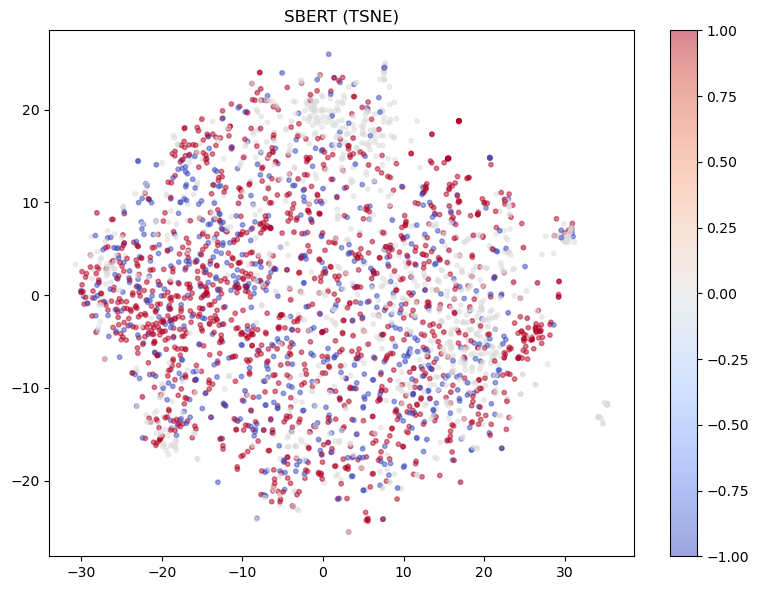

In [33]:
representations = {
    "TF-IDF": X_tfidf,
    "CountVectorizer": X_count,
    "W2V Avg Manual": X_w2v_manual,
    "TFIDF + W2V": X_tfidf_w2v_manual,
    "Word2Vec": X_w2v,
    "FastText": X_fasttext,
    "BERT": X_bert,
    "SBERT": X_sbert
}

for name, X in representations.items():
    print(f"=== {name} ===")
    visualize_embeddings(X, y, method='tsne', title=name)

| Цель                     | Лучшее представление        | Почему                              |
| ------------------------ | --------------------------- | ----------------------------------- |
| **Классификация (ML)**   | `CountVectorizer`, `TF-IDF` | Простые, информативные, стабильные  |
| **Семантический анализ** | `SBERT`, `BERT`             | Понимают контекст и смысл           |
| **Кластеризация**        | `CountVectorizer`, `BERT`   | Структурированные классы            |
| **Скорость обучения**    | `Word2Vec`, `FastText`      | Очень быстрые                       |
| **Визуализация**         | `BERT`, `CountVectorizer`   | Дают компактные и читаемые кластеры |
